In [1]:
#Importing modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score
import matplotlib.pyplot as plt

# Dataset loading
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [2]:
!pip install pennylane


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.9 MB/s eta 0:00:00


In [3]:
train_df.head()

,semi_major_axis_km,eccentricity,inclination_deg,orbital_period_min,apogee_km,perigee_km,right_ascension_deg,argument_perigee_deg,debris_size_cm,debris_mass_kg,...,azimuth_deg,elevation_deg,sensor_noise_db,tracking_accuracy_m,orbital_energy_j,relative_inclination_deg,debris_kinetic_energy_j,sat_maneuverability_score,collision_time_window_min,risk_level
0,-0.093772,-0.302396,-0.313267,0.250150,0.242937,0.222443,-0.362950,-0.298189,-0.295161,-0.310973,...,-0.557874,-0.542762,-0.408424,-0.318391,4.606158,-0.933725,-0.351657,-0.291027,-0.318350,0
1,-0.082224,-0.262216,-0.251267,0.266879,0.253087,0.223120,-0.292971,-0.229487,-0.231282,-0.233822,...,-0.615485,-0.419031,-0.345754,-0.248018,-0.372867,-1.174844,-0.309217,NaN,-0.246277,0
2,-0.067501,-0.153246,-0.168532,0.288223,0.270245,0.251733,-0.103706,-0.141862,-0.140597,-0.157578,...,0.019026,-0.220275,-0.132861,-0.111244,-0.065221,0.591062,-0.159018,-0.160526,-0.161396,0
3,-0.076922,-0.195895,-0.200017,0.274555,0.248918,0.236971,-0.305645,-0.201095,-0.204072,-0.217607,...,-0.459978,-0.358284,-0.313981,-0.186965,-0.240135,-0.775189,-0.243149,-0.192983,-0.204116,2
4,-0.158438,-0.751440,-0.736345,0.156911,0.147978,0.122668,-0.709388,-0.704427,-0.715481,-0.688687,...,-0.423938,-1.021586,-0.708099,-0.714821,-0.694753,-0.190417,-0.750536,-0.706822,-0.713628,0


In [4]:
test_df.head()

,semi_major_axis_km,eccentricity,inclination_deg,orbital_period_min,apogee_km,perigee_km,right_ascension_deg,argument_perigee_deg,debris_size_cm,debris_mass_kg,...,velocity_error_ms,azimuth_deg,elevation_deg,sensor_noise_db,tracking_accuracy_m,orbital_energy_j,relative_inclination_deg,debris_kinetic_energy_j,sat_maneuverability_score,collision_time_window_min
0,-0.052226,-0.079641,-0.107361,0.310406,0.279465,-1.974128,0.069698,-0.054034,-0.082598,-0.025750,...,-0.099500,0.222998,-0.030504,0.045691,-0.072224,-0.044631,1.156436,-0.044044,-0.093547,-0.094872
1,-0.069235,3.324355,-0.164976,0.285710,0.270070,0.234653,-0.178148,0.072015,-0.156857,-0.161123,...,-0.166333,-0.242421,-0.312068,-0.204704,0.062984,-0.222011,-0.153751,-0.148467,-0.155445,-0.180286
2,-0.079686,4.168648,-0.217464,0.270516,0.258402,0.246225,-0.321800,-0.223354,-0.209156,-0.250172,...,-0.207877,-0.542871,-0.422704,3.380095,-0.211946,-0.283074,-1.001575,-0.266646,-0.211778,-0.220581
3,-0.068316,-0.105636,-0.158825,0.287023,0.268559,0.269394,-0.146107,-0.144340,-0.147349,3.602804,...,-0.166091,-0.137350,-0.297446,-0.176254,3.380215,-0.180078,0.142880,-0.129547,-0.149629,-0.176941
4,-0.070738,5.014951,-0.172216,-3.461925,0.269969,0.258347,-0.200386,-0.160966,-0.180134,-0.148268,...,-0.162580,-0.318359,-0.264232,-0.219594,-0.168105,-0.193440,-0.379715,-0.187045,-0.163245,-0.178800


# Preprocessing Data

In [5]:
train_df.isna().sum()


,0
semi_major_axis_km,138
eccentricity,138
inclination_deg,117
orbital_period_min,144
apogee_km,127
perigee_km,128
right_ascension_deg,157
argument_perigee_deg,155
debris_size_cm,137
debris_mass_kg,161


In [6]:
test_df.isna().sum()

,0
semi_major_axis_km,0
eccentricity,0
inclination_deg,0
orbital_period_min,0
apogee_km,0
perigee_km,0
right_ascension_deg,0
argument_perigee_deg,0
debris_size_cm,0
debris_mass_kg,0


In [7]:


feature_cols = [col for col in train_df.columns if col not in ['risk_level']]

for col in feature_cols:
    train_df.loc[:, col] = train_df.groupby('risk_level')[col].transform(lambda x: x.fillna(x.mean()))


train_df.isna().sum()


,0
semi_major_axis_km,0
eccentricity,0
inclination_deg,0
orbital_period_min,0
apogee_km,0
perigee_km,0
right_ascension_deg,0
argument_perigee_deg,0
debris_size_cm,0
debris_mass_kg,0


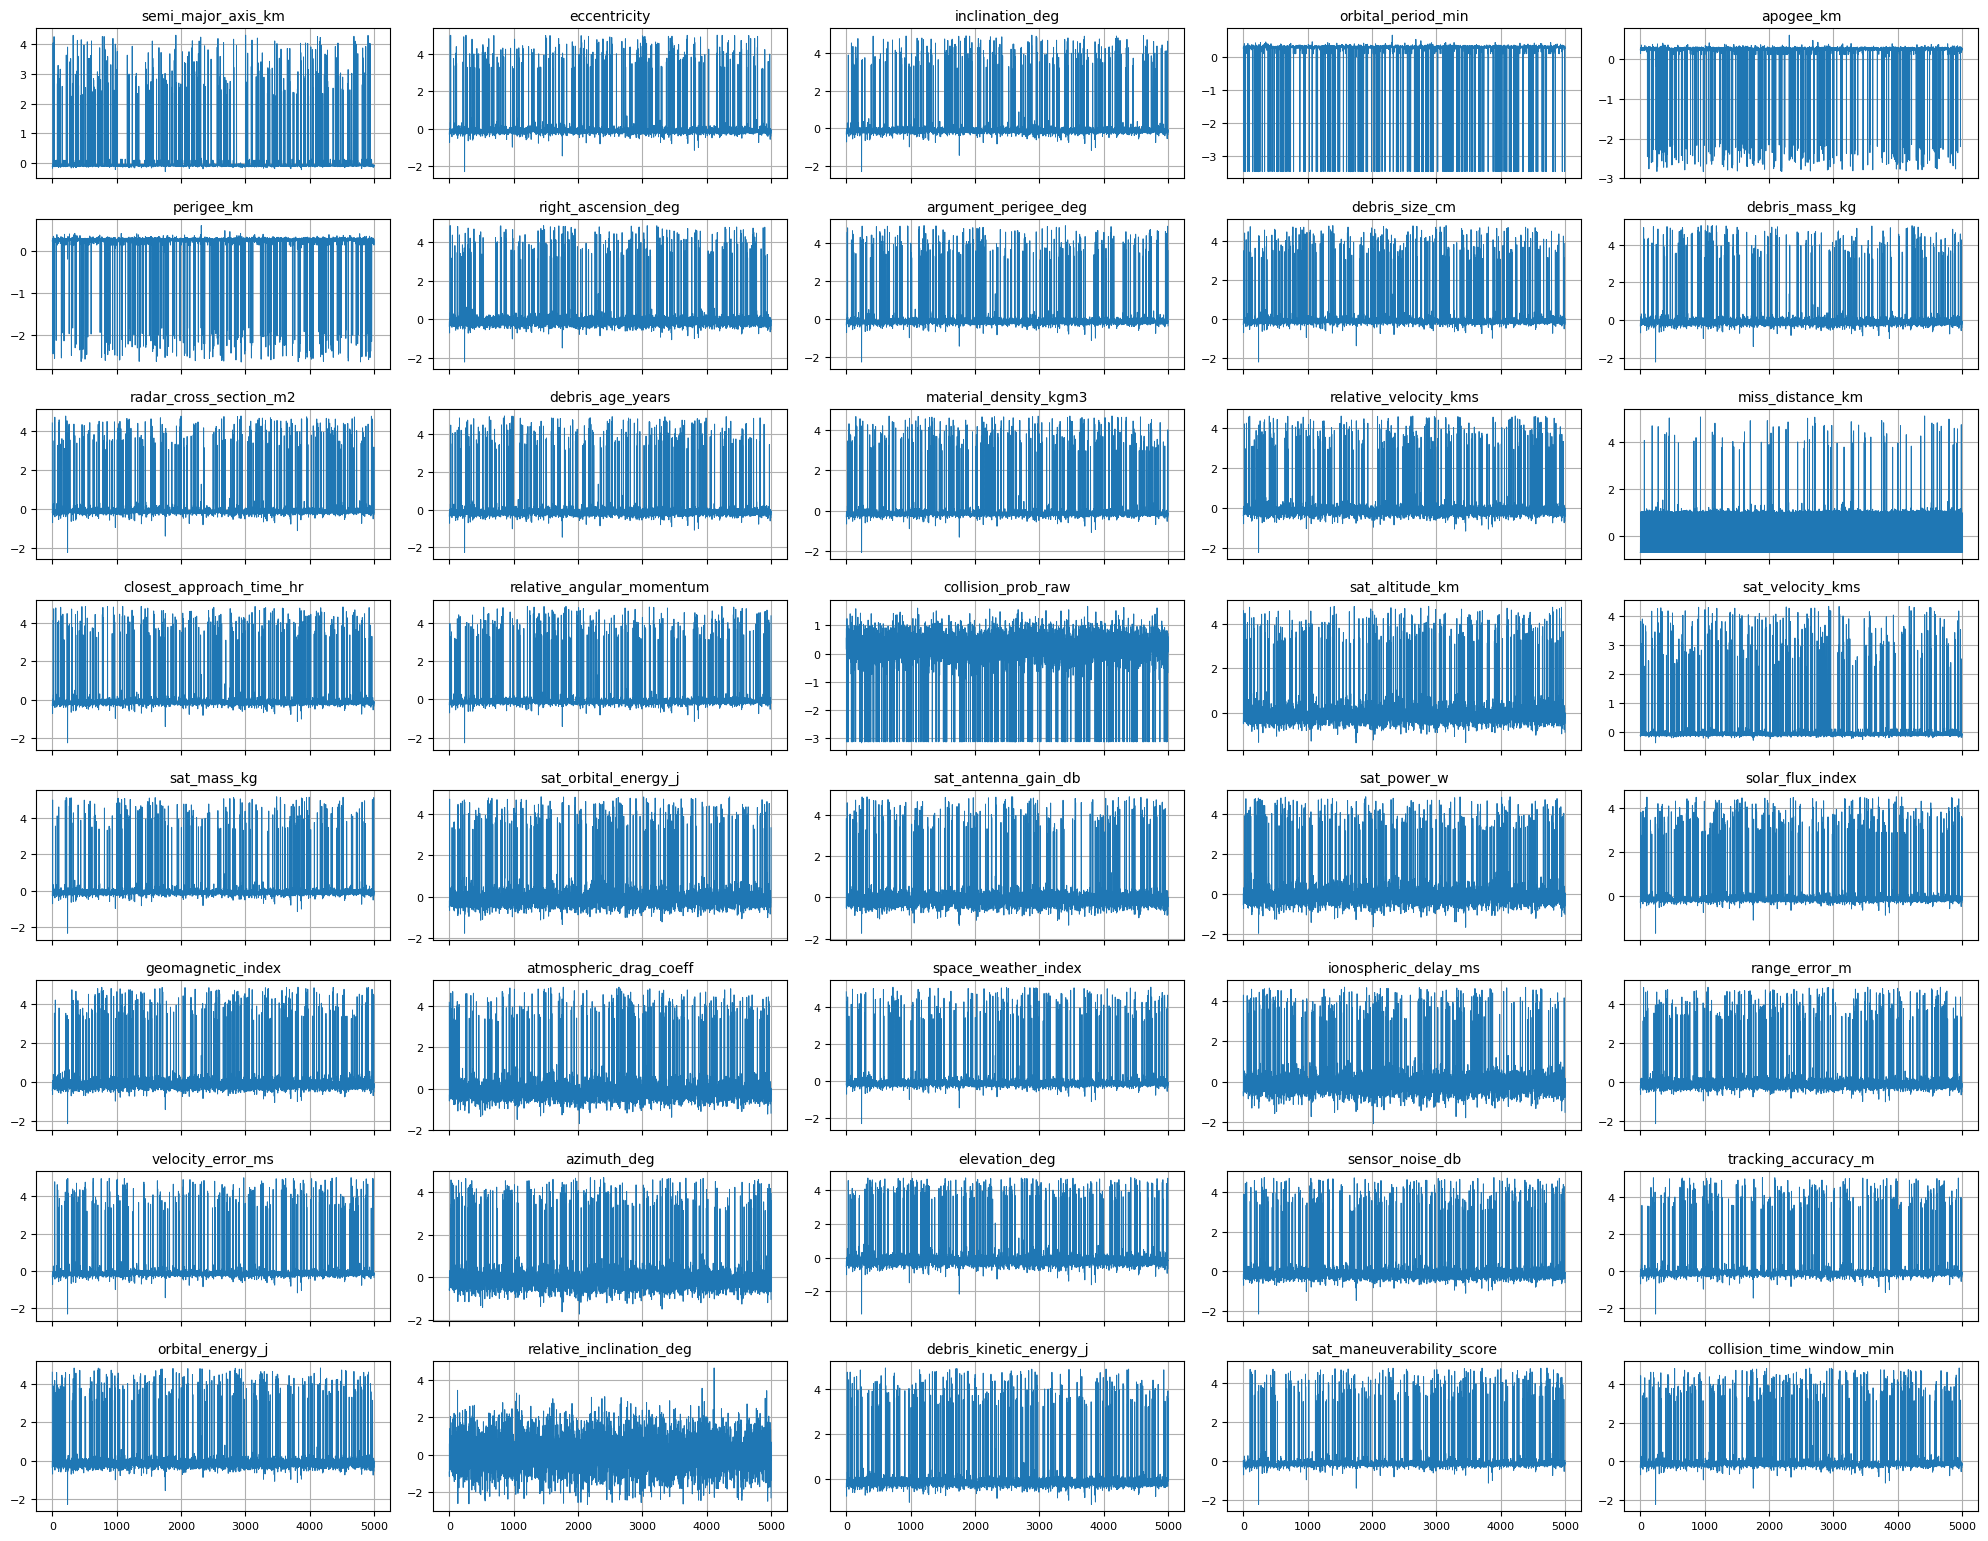

In [89]:
features_df = train_df.drop(columns=["risk_level"])

n_rows, n_cols = 8, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16), sharex=True)
axes = axes.flatten()

time = np.arange(features_df.shape[0])
for i, col in enumerate(features_df.columns):
    axes[i].plot(time, features_df[col], color='tab:blue', linewidth=0.7)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].grid(True)

for j in range(len(features_df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [10]:
#Trying Denoising data with PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = train_df.drop(columns=["risk_level"])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=0.95, random_state=42)
features_pca = pca.fit_transform(features_scaled)

features_denoised = pca.inverse_transform(features_pca)

features_denoised_df = pd.DataFrame(features_denoised, columns=features.columns)
train_denoised_df = features_denoised_df.copy()
train_denoised_df["risk_level"] = train_df["risk_level"]

train_denoised_df.head()


,semi_major_axis_km,eccentricity,inclination_deg,orbital_period_min,apogee_km,perigee_km,right_ascension_deg,argument_perigee_deg,debris_size_cm,debris_mass_kg,...,azimuth_deg,elevation_deg,sensor_noise_db,tracking_accuracy_m,orbital_energy_j,relative_inclination_deg,debris_kinetic_energy_j,sat_maneuverability_score,collision_time_window_min,risk_level
0,-0.341448,-0.474151,-0.371938,0.207176,0.249333,0.171400,-0.610682,-0.449666,-0.426261,-0.612661,...,-0.754639,-0.604776,-0.589067,-0.523281,4.817216,0.498505,-0.484584,-0.368578,-0.482791,0
1,-0.266167,-0.362819,-0.327096,0.206588,0.212033,0.162772,-0.407890,-0.332760,-0.321328,-0.351941,...,-0.691620,-0.443421,-0.439571,-0.345936,-0.485525,-1.282575,-0.400338,-0.032029,-0.328459,0
2,-0.434613,-0.429766,-0.284889,0.308032,0.358136,0.398711,-0.234268,-0.288754,-0.207069,-0.384172,...,1.480966,0.015785,0.099706,-0.515794,-0.490007,0.691156,0.017588,-0.198253,-0.245126,0
3,-0.242240,-0.276525,-0.258129,0.208851,0.199216,0.159249,-0.450470,-0.304065,-0.304597,-0.361904,...,-0.829349,-0.437988,-0.482781,-0.251421,-0.309257,-0.422927,-0.384793,-0.284704,-0.303181,2
4,-0.323108,-0.843306,-0.863984,0.053185,-0.006221,-0.031340,-0.763395,-0.819267,-0.816305,-0.713341,...,-0.382714,-1.018883,-0.760957,-0.774967,-0.759207,-1.366245,-0.843486,-0.854078,-0.767694,0


In [11]:
X = train_df.drop('risk_level', axis=1).values
y = train_df['risk_level'].values
X_test = test_df.values

In [27]:
# Split training data (Adjust split ratio as needed)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

## Classical SVM

In [13]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
svc = SVC(class_weight='balanced', probability=False)

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
y_pred_classical = best_svm.predict(X_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


##QSVM

In [76]:
pca = PCA(n_components=6)
from sklearn.svm import NuSVC
X_test_reduced_full = pca.fit_transform(X)

In [77]:
X_small = X[:120]
y_small = y[:120]

# Split into train/test
X_train_new = X_small[:100]
y_train_new = y_small[:100]
X_test_new = X_small[100:]
y_test_new = y_small[100:]

In [78]:
pca = PCA(n_components=6)
X_train_reduced = pca.fit_transform(X_train_new)
X_test_reduced = pca.transform(X_test_new)

In [80]:
import pennylane as qml
import numpy as np
from sklearn.svm import SVC

num_qubits = 6
dev = qml.device("lightning.qubit", wires=num_qubits)

@qml.qnode(dev)
def qkernel_circuit(a, b):
    qml.AngleEmbedding(features=a, wires=range(num_qubits), rotation='X')
    qml.adjoint(qml.AngleEmbedding(features=b, wires=range(num_qubits), rotation='X'))
    return qml.probs(wires=range(num_qubits))
def qkernel(A, B):
    return np.array([[qkernel_circuit(a, b)[0] for b in B] for a in A])


qsvm = SVC(kernel=qkernel)
qsvm.fit(X_train_reduced, y_train_new)

y_pred_quantum = qsvm.predict(X_test_reduced_full)


#Score Calculation

In [81]:
def calculate_scores(y_true, y_pred):

  balanced_acc = balanced_accuracy_score(y_true, y_pred)
  macro_f1 = f1_score(y_true, y_pred, average='macro')

  return balanced_acc, macro_f1

In [82]:
balanced_acc_classical, f1_classical = calculate_scores(y_val, y_pred_classical)
balanced_acc_quantum, f1_quantum = calculate_scores(y, y_pred_quantum)

In [83]:


print(f"Classical SVM - Balanced Accuracy: {balanced_acc_classical:.3f}, Macro F1: {f1_classical:.3f}")
print(f"Quantum SVM - Balanced Accuracy: {balanced_acc_quantum:.3f}, Macro F1: {f1_quantum:.3f}")



Classical SVM - Balanced Accuracy: 0.501, Macro F1: 0.494
Quantum SVM - Balanced Accuracy: 0.334, Macro F1: 0.279


# Predicting Test

In [85]:
X_test_pred = pca.fit_transform(X_test)

In [87]:
test_pred_classical = best_svm.predict(X_test)
test_pred_quantum = qsvm.predict(X_test_pred)

#Submission

In [88]:
predictions = pd.DataFrame({
    'sample_id': range(len(X_test)),
    'label_classical': test_pred_classical,
    'label_quantum': test_pred_quantum
})
predictions.to_csv('predictions.csv', index=False)
